In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/",one_hot = True)

C:\Users\hansh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hansh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hansh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hansh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28
X=tf.placeholder(tf.float32,[None,n_input])
W_encode = tf.Variable(tf.random_normal([n_input,n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
W_decode = tf.Variable(tf.random_normal([n_hidden,n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))

In [5]:
cost = tf.reduce_mean(tf.pow(X-decoder,2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()
sess =tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)
for epoch in range(training_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        _,cost_val = sess.run([optimizer,cost],feed_dict = {X:batch_xs})
        total_cost += cost_val
    print('Epoch:','%04d' %(epoch+1),'Avg. cost=','{:.4f}'.format(total_cost/total_batch))

Epoch: 0001 Avg. cost= 0.1938
Epoch: 0002 Avg. cost= 0.0577
Epoch: 0003 Avg. cost= 0.0482
Epoch: 0004 Avg. cost= 0.0442
Epoch: 0005 Avg. cost= 0.0398
Epoch: 0006 Avg. cost= 0.0368
Epoch: 0007 Avg. cost= 0.0339
Epoch: 0008 Avg. cost= 0.0319
Epoch: 0009 Avg. cost= 0.0310
Epoch: 0010 Avg. cost= 0.0300
Epoch: 0011 Avg. cost= 0.0285
Epoch: 0012 Avg. cost= 0.0282
Epoch: 0013 Avg. cost= 0.0267
Epoch: 0014 Avg. cost= 0.0264
Epoch: 0015 Avg. cost= 0.0262
Epoch: 0016 Avg. cost= 0.0260
Epoch: 0017 Avg. cost= 0.0258
Epoch: 0018 Avg. cost= 0.0254
Epoch: 0019 Avg. cost= 0.0242
Epoch: 0020 Avg. cost= 0.0240


<function matplotlib.pyplot.show(*args, **kw)>

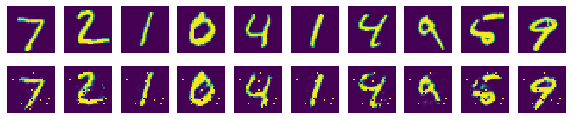

In [9]:
sample_size = 10
samples = sess.run(decoder,feed_dict={X:mnist.test.images[:sample_size]})
fig,ax = plt.subplots(2,sample_size,figsize=(sample_size,2))
for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    ax[1][i].imshow(np.reshape(samples[i],(28,28)))
plt.show